# Исследование выборки пациентов с бронхиальной астмой

## Описание проекта

От коллег поступила база данных. В ней содержится информация по двум группам: пациенты с бронхиальной астмой и контрольная группа здоровых доноров. При этом пациенты с БА приходили на прием трижды (в обострение заболевание, в ремиссию через месяц и в ремиссию спустя несколько месяцев).

<a id="Задачи_исследования"></a>

## Задачи исследования

### Этап 1: EDA (Exploratory Data Analysis)/ Разведочный анализ данных

* [1.1) Загрузка данных: получение и импорт данных из различных источников, таких как файлы CSV, базы данных и другие форматы;](#Читаем_данные)

* [1.2) Понимание данных: изучение структуры данных, описания переменных, типов данных, размера набора данных и т. д.;](#Предварительный_нализ)

* [1.3) Очистка данных: обработка пропущенных значений, удаление дубликатов, преобразование данных в нужные форматы и т. д.;](#Чистим_данные)

* [1.4) В таблице есть как минимум 3 опечатки в данных. Предложите алгоритм проверки данных для выявления этих опечаток.](#Опечатки)

### Этап 2: Статистический анализ

* [2.1) Изобразить на графиках и рассчитать статистическую значимость различий по динамике изменения показателя N T2 3 pe+ в группе пациентов с БА в обострении и в динамике. Обозначьте и обоснуйте выбранные статистические критерии.](#2_1)

* [2.2) Сравнить (графически и рассчитать статистическую значимость) исходных показателей пола и возраста в группе здоровых людей, пациентов, получавших базовую терапию с любыми глюкокортикоидами (столбец L – «Базовая терапия») и без них. Обозначьте и обоснуйте выбранные статистические критерии.](#2_2)

* [2.3) Коллеги хотят понять, есть ассоциации между новыми лабораторными показателями (столбцы N-AE) и стандартными демографическими, клиническими характеристиками и разными видами терапии у пациентов. Предложите варианты решений для ответа на данный вопрос.](#2_3)

* [2.4) Коллеги хотят понять, можно ли новые лабораторные показатели (столбцы N-AE) использовать как диагностические маркеры для того, чтобы различать здоровых и пациентов. Предложите варианты решений для ответа на данный вопрос. Если каких-то данных или групп не хватает в таблице для моделирования – укажите, чего не хватает.](#2_4)




## Описание данных

* pathology:
    * BA - пациенты с бронхиальной астмой;
    * health - контрольная группа здоровых доноров.
* stage:    
    * acute - обострение;
    * rem - ремиссия через месяц;
    * rem 2 -  ремиссия через несколько месяцев.
* number:
    * номер.
* gender:
    * 0 - женщина;
    * 1 - мужчина.
* age:
    * years - возраст в годах.
* длительность заболевания:
    * years - длительность заболевания в годах
* severity:
    * 1 - средней степени, неконтролируемая или впервые выявленная;
    * 2 - средней степени, персистирующая;
    * 3 - тяжелое, персистирующее течение.
* тяжесть градация:
    * 1 - med (средняя);
    * 2 - high (высокая).
* FEV1/FEV:
    * COMMENT - оценка дыхания (индекс Тиффно).
* stepen:
    * 1 - легкая (больше 80%); 
    * 2 - средня (60-80%);
    * 3 - тяжелая (меньше 60%).
* динамика состояния:
    * 0 - улучшение или стабилизация; 
    * 1 - ухудшение.
* Базовая терапия:
    * COMMENT. (ГКС - Будесонид, Беклометазон (ГКС местного применения)); Агонисты В2-рецепторов: Формотерол, Форадил комби (селективный); Комб ГКС + Агонисты: Симбикорт, Серетид, Форадил Комби; М-холинолитик: Тиатропия бромид (Спирива Респимат); Блокатор Лей3еновых рецепторов: Монтелукаст.
* СРБ:
    * mg/l (мг/л); Норма СРБ - 5 мг/мл; <1% - низкие риски; >5% - наличие острого воспаления.



<a id="Читаем_данные"></a>

## Этап 1.1 Импортируем библиотеки, получим и изучим данные

[Вернуться к задачам исследования](#Задачи_исследования)

In [1]:
import pandas as pd                                           
import numpy as np 
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from matplotlib import pyplot as plt                          
import seaborn as sns                                         
import warnings    

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой 
pd.options.display.float_format = '{:.2f}'.format

# Установить настройку для отображения всех колонок
pd.set_option('display.max_columns', None)

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('/Users/Edward/Code/DS+/csv/BA.xlsx')

<a id="Предварительный_нализ"></a>

## Этап 1.2 Изучим структуру данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pathology                 108 non-null    object 
 1   stage                     108 non-null    object 
 2   number                    108 non-null    int64  
 3   gender                    108 non-null    int64  
 4   age                       108 non-null    float64
 5   длительность заболевания  62 non-null     float64
 6   severity                  63 non-null     float64
 7   тяжесть градация          63 non-null     float64
 8   FEV1/FEV                  39 non-null     float64
 9   stepen                    55 non-null     float64
 10  динамика состояния        54 non-null     float64
 11  Базовая терапия           22 non-null     object 
 12  СРБ                       22 non-null     float64
 13  N T1 3 ++                 103 non-null    float64
 14  N T1 3 pe+

In [4]:
df.head(5)

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+
0,BA,acute,4,0,30.00,3.00,2.00,1.00,0.81,1.00,0.00,"Будесонид/Формотерол 160/4,5 мкг по 1 дозе 2 р...",0.70,626.31,799.27,615.88,1320.28,1132.83,1141.82,41.20,47.50,44.35,6.90,34.20,20.55,34.20,5.70,19.95,3.30,48.60,25.95
1,BA,acute,5,0,42.00,1.00,2.00,1.00,0.84,1.00,1.00,"Будесонид/Формотерол 160/4,5 мкг по 1 дозе 2 р...",16.00,364.89,364.89,354.52,5270.23,2573.69,2936.63,15.80,43.90,29.85,12.40,18.30,15.35,18.30,24.30,21.30,0.20,71.50,35.85
2,BA,acute,12,0,46.00,6.00,2.00,1.00,0.86,1.00,1.00,"Будесонид/Формотерол 160/4,5 мкг по 2 дозы 2 р...",0.60,256.97,2021.27,623.33,24337.96,10251.00,10274.00,3.20,24.70,13.95,0.30,75.20,37.75,75.20,0.00,37.60,0.00,96.60,48.30
3,BA,acute,8,1,26.00,12.00,2.00,1.00,0.73,2.00,0.00,"Будесонид/Формотерол 160/4,5 мкг по 1 дозе 2 р...",0.10,286.50,286.50,290.93,2703.69,1171.80,1207.77,29.30,65.70,47.50,1.90,13.70,7.80,13.70,16.60,15.15,0.10,68.70,34.40
4,BA,acute,11,0,32.00,6.00,2.00,1.00,0.63,2.00,0.00,"Будесонид/Формотерол 160/4,5 мкг по 2 дозы 2 р...",0.90,724.67,313.10,544.46,21765.45,4634.26,5113.45,28.70,72.50,50.60,0.20,27.20,13.70,27.20,0.10,13.65,0.00,71.20,35.60


↑ Обратим внимание, что у всех здоровых пациентов в колонке 'stage', присутствует значение 'acute', что нелогично. Заменим все значения на 'health'

In [5]:
# Применяем условие и устанавливаем значение 'health' в столбце 'stage'
df.loc[df['pathology'] == 'health', 'stage'] = 'health'

In [6]:
df['age'].to_list()

[30.0,
 42.0,
 46.0,
 26.0,
 32.0,
 42.0,
 46.0,
 47.0,
 48.0,
 49.0,
 51.0,
 57.0,
 22.0,
 27.0,
 49.0,
 52.0,
 57.0,
 65.0,
 67.0,
 70.0,
 1.8,
 22.0,
 23.0,
 23.0,
 23.0,
 26.0,
 27.0,
 29.0,
 29.0,
 30.0,
 30.0,
 30.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 34.0,
 35.0,
 35.0,
 35.0,
 35.0,
 36.0,
 37.0,
 37.0,
 38.0,
 38.0,
 39.0,
 40.0,
 41.0,
 43.0,
 45.0,
 46.0,
 46.0,
 49.0,
 51.0,
 54.0,
 55.0,
 56.0,
 56.0,
 58.0,
 60.0,
 60.0,
 61.0,
 63.0,
 69.0,
 70.0,
 77.0,
 30.0,
 42.0,
 46.0,
 26.0,
 32.0,
 42.0,
 46.0,
 47.0,
 48.0,
 49.0,
 52.0,
 57.0,
 67.0,
 27.0,
 57.0,
 65.0,
 70.0,
 38.0,
 46.0,
 49.0,
 51.0,
 30.0,
 42.0,
 46.0,
 26.0,
 32.0,
 47.0,
 47.0,
 48.0,
 49.0,
 51.0,
 57.0,
 67.0,
 27.0,
 49.0,
 52.0,
 57.0,
 65.0,
 70.0,
 46.0]

↑ В 20 индексе колонке 'age', присутствует значение 1.8. Скорее всего связано с ошибкой ручного ввода.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number,108.00,16.70,11.58,1.00,7.75,15.00,22.00,46.00
gender,108.00,0.31,0.47,0.00,0.00,0.00,1.00,1.00
age,108.00,44.19,14.00,1.80,32.00,46.00,52.50,77.00
длительность заболевания,62.00,14.26,18.78,0.00,3.00,7.00,17.50,116.00
severity,63.00,2.24,0.61,1.00,2.00,2.00,3.00,3.00
тяжесть градация,63.00,1.33,0.48,1.00,1.00,1.00,2.00,2.00
FEV1/FEV,39.00,0.65,0.13,0.41,0.56,0.65,0.76,0.86
stepen,55.00,2.17,0.69,1.00,2.00,2.00,3.00,3.00
динамика состояния,54.00,0.33,0.48,0.00,0.00,0.00,1.00,1.00
СРБ,22.00,5.32,7.82,0.10,0.62,1.55,7.10,33.10


## Вывод

Проблемы, которые нужно решить и понять: 
* Некорректный тип данных в столбце 'age';
* Много пропущенных значений.

<a id="Чистим_данные"></a>

## Этап 1.3 Очистка данных

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Опечатки"></a>

### Первая опечатка

[Вернуться к задачам исследования](#Задачи_исследования)

In [8]:
# Исправим ошибку с возрастом 
df.at[20, 'age'] = 18.0

Поработаем с пропущенными значениями

In [9]:
# Создание DataFrame (df) и подсчет пропущенных значений
nan_counts = df.isna().sum()

# Отображение DataFrame с количеством пропущенных значений и подкрашиванием цветами
display(pd.DataFrame(nan_counts, columns=['NaNs, count'])
        .style.background_gradient('coolwarm'))

,"NaNs, count"
pathology,0
stage,0
number,0
gender,0
age,0
длительность заболевания,46
severity,45
тяжесть градация,45
FEV1/FEV,69
stepen,53


In [10]:
# Создание DataFrame (df) и подсчет пропущенных значений в процентах
nan_percentages = round((df.isna().mean() * 100), 2)

# Отображение DataFrame с количеством пропущенных значений и подкрашиванием цветами
display(pd.DataFrame(nan_percentages, columns=['NaNs, %'])
        .style.format('{:.2f}')
        .background_gradient('coolwarm', axis=0))

,"NaNs, %"
pathology,0.00
stage,0.00
number,0.00
gender,0.00
age,0.00
длительность заболевания,42.59
severity,41.67
тяжесть градация,41.67
FEV1/FEV,63.89
stepen,49.07


In [11]:
df.loc[df['Базовая терапия'].isnull()]

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+
20,health,health,18,0,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,602.00,556.00,1256.00,955.00,629.00,1115.00,19.20,32.10,25.65,34.50,20.50,27.50,3.50,11.70,7.60,42.70,35.70,39.20
21,health,health,4,0,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542.00,457.00,5874.00,3753.00,NaN,NaN,18.30,36.10,27.20,28.30,14.40,21.35,1.20,11.00,6.10,52.10,38.40,45.25
22,health,health,8,0,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,635.00,818.00,3699.00,2312.00,NaN,NaN,22.80,42.30,32.55,20.70,10.50,15.60,1.40,10.10,5.75,55.10,37.10,46.10
23,health,health,44,0,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,354.00,642.00,585.00,352.00,594.00,40.30,71.90,56.10,8.60,0.00,4.30,3.90,28.10,16.00,47.20,0.00,23.60
24,health,health,45,0,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,390.00,578.00,547.00,354.00,575.00,47.10,74.20,60.65,3.10,0.00,1.55,1.80,25.80,13.80,48.00,0.00,24.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,BA,rem2,19,0,52.00,40.00,3.00,2.00,0.53,3.00,0.00,NaN,NaN,171.57,164.22,162.76,2854.92,2753.58,2753.58,9.90,82.40,46.15,2.50,10.20,6.35,10.20,6.40,8.30,0.30,87.30,43.80
104,BA,rem2,15,1,57.00,16.00,3.00,2.00,0.42,3.00,1.00,NaN,NaN,223.06,218.65,215.70,4093.33,3559.21,3557.69,3.30,67.40,35.35,0.20,31.20,15.70,31.20,0.80,16.00,0.40,96.00,48.20
105,BA,rem2,16,0,65.00,40.00,3.00,2.00,0.57,3.00,0.00,NaN,NaN,190.68,292.41,292.41,2616.01,3016.84,3015.33,1.70,94.10,47.90,0.50,4.20,2.35,4.20,1.60,2.90,0.30,97.60,48.95
106,BA,rem2,22,1,70.00,4.00,1.00,1.00,0.58,3.00,0.00,NaN,NaN,303.07,490.08,146.36,3153.92,3353.72,3353.72,0.90,6.90,3.90,0.80,91.00,45.90,91.00,0.20,45.60,0.00,98.30,49.15


 ↑ Заметим, что в колонке 'pathology' у здоровых пациентов 'health' признаки болезни в колонках ['длительность заболевания', 'severity', 'тяжесть градация', 'FEV1/FEV', 'stepen', 'динамика состояния', 'Базовая терапия', 'СРБ'] присутствует значение NaN, заменим все на ноль, так как это выборка здоровых людей.

In [12]:
# Заменим признаки болезни у здоровых людей на ноль
columns_to_zero = ['длительность заболевания', 'severity', 'тяжесть градация', 'FEV1/FEV', 'stepen', 'динамика состояния', 'Базовая терапия', 'СРБ']
df.loc[df['pathology'] == 'health', columns_to_zero] = 0

In [13]:
df.loc[df['Базовая терапия'].isnull()]

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+,FEV1/FEV
68,BA,rem,4,0,30.00,3.00,2.00,1.00,NaN,1.00,0.00,NaN,NaN,313.10,301.27,298.32,1863.06,1780.25,1766.70,35.50,61.70,48.60,2.80,13.70,8.25,13.70,18.80,16.25,0.20,61.50,30.85,NaN
69,BA,rem,5,0,42.00,1.00,2.00,1.00,NaN,1.00,1.00,NaN,NaN,479.08,480.56,459.78,3777.62,4040.19,3906.60,39.80,60.60,50.20,4.60,30.90,17.75,30.90,4.90,17.90,0.20,55.40,27.80,NaN
70,BA,rem,12,0,46.00,6.00,2.00,1.00,NaN,1.00,1.00,NaN,NaN,316.06,237.80,293.89,15884.80,3465.21,3466.73,9.90,20.10,15.00,0.00,56.40,28.20,56.40,5.40,30.90,0.00,90.10,45.05,NaN
71,BA,rem,8,1,26.00,12.00,2.00,1.00,NaN,2.00,0.00,NaN,NaN,941.22,1279.76,1218.27,1768.20,1520.02,1527.54,84.90,75.50,80.20,1.60,24.20,12.90,24.20,0.30,12.25,2.60,10.90,6.75,NaN
72,BA,rem,11,0,32.00,6.00,2.00,1.00,NaN,2.00,0.00,NaN,NaN,812.71,829.14,821.67,2699.15,1887.16,2131.34,37.50,NaN,37.50,16.10,NaN,16.10,NaN,NaN,NaN,46.10,43.70,44.90,NaN
73,BA,rem,1,0,42.00,13.00,2.00,1.00,NaN,2.00,NaN,NaN,NaN,474.62,540.00,502.84,2307.87,1765.19,1838.97,39.90,65.90,52.90,10.00,27.30,18.65,27.30,4.10,15.70,1.60,48.50,25.05,NaN
74,BA,rem,3,0,46.00,10.00,2.00,1.00,NaN,2.30,0.00,NaN,NaN,357.48,360.45,350.08,3298.51,2321.46,2410.54,25.90,42.60,34.25,9.10,27.70,18.40,27.70,16.10,21.90,0.20,64.90,32.55,NaN
75,BA,rem,18,1,47.00,1.00,2.00,1.00,NaN,2.00,0.00,NaN,NaN,1266.26,308.67,280.59,4034.11,4137.37,4126.74,1.00,81.70,41.35,10.60,14.80,12.70,14.80,2.70,8.75,0.10,88.30,44.20,NaN
76,BA,rem,21,0,48.00,0.00,1.00,1.00,NaN,2.00,1.00,NaN,NaN,276.16,279.43,281.01,7353.32,14631.00,14619.09,3.10,3.90,3.50,0.20,92.60,46.40,92.60,0.10,46.35,2.50,94.30,48.40,NaN
77,BA,rem,2,0,49.00,3.00,2.00,1.00,NaN,2.00,1.00,NaN,NaN,350.08,415.27,381.18,981.61,938.23,930.76,30.40,47.00,38.70,18.30,21.30,19.80,21.30,21.20,21.25,1.40,49.80,25.60,NaN


 ↑ Заметим, что в колонке 'pathology' у пациентов с бронхиальной астмой 'BA', у которых присутствует признак ремиссия ['rem', 'rem2'] в колонке 'stage', признаки в колонках ['Базовая терапия', 'СРБ]' присутствует значение NaN, заменим все на ноль, так как ремиссия — период течения хронической болезни, который характеризуется значительным ослаблением или исчезновением её симптомов, следовательно скорее всего базовая терапия была отменена.

In [14]:
# Заменим признаки базовой терапии у пациентов с ремиссией на отсутсвует
df.loc[df['stage'].isin(['rem', 'rem2']), 'Базовая терапия'] = 'Отсутствует'

In [15]:
df.loc[df['СРБ'].isnull()]

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+,FEV1/FEV
68,BA,rem,4,0,30.00,3.00,2.00,1.00,NaN,1.00,0.00,Отсутствует,NaN,313.10,301.27,298.32,1863.06,1780.25,1766.70,35.50,61.70,48.60,2.80,13.70,8.25,13.70,18.80,16.25,0.20,61.50,30.85,NaN
69,BA,rem,5,0,42.00,1.00,2.00,1.00,NaN,1.00,1.00,Отсутствует,NaN,479.08,480.56,459.78,3777.62,4040.19,3906.60,39.80,60.60,50.20,4.60,30.90,17.75,30.90,4.90,17.90,0.20,55.40,27.80,NaN
70,BA,rem,12,0,46.00,6.00,2.00,1.00,NaN,1.00,1.00,Отсутствует,NaN,316.06,237.80,293.89,15884.80,3465.21,3466.73,9.90,20.10,15.00,0.00,56.40,28.20,56.40,5.40,30.90,0.00,90.10,45.05,NaN
71,BA,rem,8,1,26.00,12.00,2.00,1.00,NaN,2.00,0.00,Отсутствует,NaN,941.22,1279.76,1218.27,1768.20,1520.02,1527.54,84.90,75.50,80.20,1.60,24.20,12.90,24.20,0.30,12.25,2.60,10.90,6.75,NaN
72,BA,rem,11,0,32.00,6.00,2.00,1.00,NaN,2.00,0.00,Отсутствует,NaN,812.71,829.14,821.67,2699.15,1887.16,2131.34,37.50,NaN,37.50,16.10,NaN,16.10,NaN,NaN,NaN,46.10,43.70,44.90,NaN
73,BA,rem,1,0,42.00,13.00,2.00,1.00,NaN,2.00,NaN,Отсутствует,NaN,474.62,540.00,502.84,2307.87,1765.19,1838.97,39.90,65.90,52.90,10.00,27.30,18.65,27.30,4.10,15.70,1.60,48.50,25.05,NaN
74,BA,rem,3,0,46.00,10.00,2.00,1.00,NaN,2.30,0.00,Отсутствует,NaN,357.48,360.45,350.08,3298.51,2321.46,2410.54,25.90,42.60,34.25,9.10,27.70,18.40,27.70,16.10,21.90,0.20,64.90,32.55,NaN
75,BA,rem,18,1,47.00,1.00,2.00,1.00,NaN,2.00,0.00,Отсутствует,NaN,1266.26,308.67,280.59,4034.11,4137.37,4126.74,1.00,81.70,41.35,10.60,14.80,12.70,14.80,2.70,8.75,0.10,88.30,44.20,NaN
76,BA,rem,21,0,48.00,0.00,1.00,1.00,NaN,2.00,1.00,Отсутствует,NaN,276.16,279.43,281.01,7353.32,14631.00,14619.09,3.10,3.90,3.50,0.20,92.60,46.40,92.60,0.10,46.35,2.50,94.30,48.40,NaN
77,BA,rem,2,0,49.00,3.00,2.00,1.00,NaN,2.00,1.00,Отсутствует,NaN,350.08,415.27,381.18,981.61,938.23,930.76,30.40,47.00,38.70,18.30,21.30,19.80,21.30,21.20,21.25,1.40,49.80,25.60,NaN


 ↑ Заметим, что в колонке 'pathology' у пациентов с бронхиальной астмой 'BA', у которых присутствует признак ремиссия ['rem', 'rem2'] в колонках ['FEV1/FEV', 'СРБ'] присутствует значение NaN, заменить на ноль мы не можем, так как это искозит данные. Поэтому оставим так.

Поработаем с дубликатами

In [16]:
def find_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения в столбце '{column}':")
        for value in unique_values:
            print(value)
        print()

find_unique_values(df)

Уникальные значения в столбце 'pathology':
BA
health

Уникальные значения в столбце 'stage':
acute
health
rem
rem2

Уникальные значения в столбце 'number':
4
5
12
8
11
1
3
18
21
2
7
6
13
10
17
19
15
16
14
22
44
45
38
41
39
9
20
36
37
43
46
31
40
24
34
30
26
27
35
42
33
29
23
28
25
32

Уникальные значения в столбце 'gender':
0
1

Уникальные значения в столбце 'age':
30.0
42.0
46.0
26.0
32.0
47.0
48.0
49.0
51.0
57.0
22.0
27.0
52.0
65.0
67.0
70.0
18.0
23.0
29.0
31.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
43.0
45.0
54.0
55.0
56.0
58.0
60.0
61.0
63.0
69.0
77.0

Уникальные значения в столбце 'длительность заболевания':
3.0
1.0
6.0
12.0
13.0
10.0
0.0
7.0
15.0
24.0
18.0
40.0
16.0
44.0
4.0
5.0
116.0

Уникальные значения в столбце 'severity':
2.0
1.0
3.0
0.0

Уникальные значения в столбце 'тяжесть градация':
1.0
2.0
0.0

Уникальные значения в столбце 'FEV1/FEV ':
0.811
0.845
0.857
0.726
0.629
0.635
0.704
0.65
0.606
0.788
0.681
0.72
0.537
0.555
0.584
0.41
0.452
0.465
0.491
0.424
nan
0.656
0

In [17]:
df[df['длительность заболевания'] == 116.0]

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+,FEV1/FEV
82,BA,rem,15,1,57.00,116.00,3.00,2.00,NaN,3.00,1.00,Отсутствует,NaN,7639.46,6146.37,4514.16,7402.61,7975.77,7917.67,1.70,98.50,50.10,0.30,1.30,0.80,1.30,0.20,0.75,0.00,98.00,49.00,NaN


<a id="Опечатки"></a>

### Вторая опечатка

↑ Аномальное значение (выброс) в длительности заболевания, заменим медианым значением, так как медиана более устойчива к выбросам.

[Вернуться к задачам исследования](#Задачи_исследования)

In [18]:
df.loc[df['длительность заболевания'] == 116.0, 'длительность заболевания'] = df.loc[df['stage'] == 'rem', 'длительность заболевания'].median()

In [19]:
df[df['stepen'] == 2.3]

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+,FEV1/FEV
74,BA,rem,3,0,46.00,10.00,2.00,1.00,NaN,2.30,0.00,Отсутствует,NaN,357.48,360.45,350.08,3298.51,2321.46,2410.54,25.90,42.60,34.25,9.10,27.70,18.40,27.70,16.10,21.90,0.20,64.90,32.55,NaN


<a id="Опечатки"></a>

### Третья опечатка

↑ Некорректная степень оценки пациента, так как оценка производится целыми числами (0, 1, 2, 3), скорее всего хотели ввести 2, так что заменим на двойку.

[Вернуться к задачам исследования](#Задачи_исследования)

In [20]:
# Исправим ошибку со степенью тяжести
df['stepen'] = df['stepen'].replace(2.3, 2.0)

## Вывод

Проблемы, которые быле решины: 
* Устранены некорректные типы данных (опечатки):
    * возраст пациента: было 1.8, стало 18.0;
    * длительность заболеваниея пациента: было 116.00, стало медианое значение;
    * степень тяжести: было 2.3, стало 2.0;
    * статус здоровых пациентов: было acute, стало health.
* Устранены пропущенные значения, кроме 'FEV1/FEV' и 'СРБ', так как эти значения нельзя ничем заполнить, иначе исказяться результаты исследования.

<a id="2_1"></a>

## Этап 2.1 
* Изобразить на графиках и рассчитать статистическую значимость различий по динамике изменения показателя N T2 3 pe+ в группе пациентов с БА в обострении и в динамике. Обозначьте и обоснуйте выбранные статистические критерии.

[Вернуться к задачам исследования](#Задачи_исследования)

В данном контексте, я предложу два теста: t-тест Стьюдента и тест Уилкоксона-Манна-Уитни. Эти тесты были предложены на основании следующих рассуждений:

* t-тест Стьюдента: Этот тест является одним из наиболее распространенных методов для сравнения средних значений двух выборок. Он подходит для случаев, когда данные подчиняются нормальному распределению и когда выборки независимы и имеют примерно равные дисперсии. Этот тест был предложен на тот случай, если ваши данные подчиняются этим критериям.

* тест Уилкоксона-Манна-Уитни: Этот тест, также известный как тест Манна-Уитни, является непараметрическим методом, который не делает строгих предположений о форме распределения данных. Это делает его более универсальным и применимым в ситуациях, когда данные не подчиняются нормальному распределению или когда они имеют значительные выбросы. Он также может использоваться для сравнения ранговых данных, что делает его подходящим для многих типов биологических данных.

Таким образом, предложенные тесты являются распространенными и универсальными методами для анализа такого типа данных.

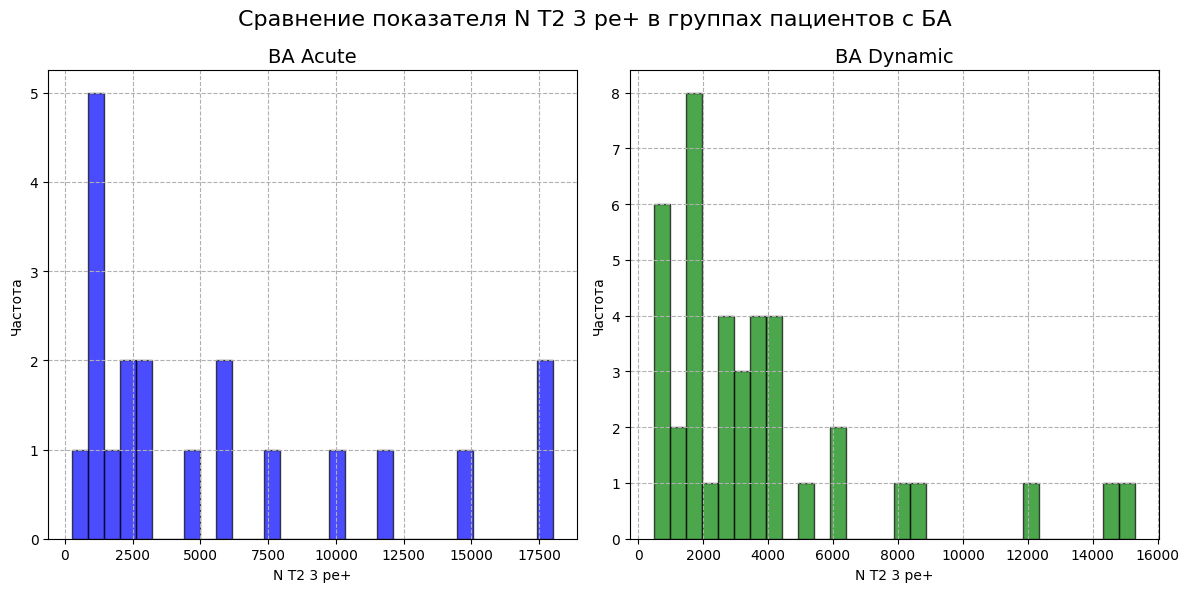

In [21]:
# Выделение подмножеств данных для группы пациентов с БА в обострении
ba_acute = df[(df['pathology'] == 'BA') & (df['stage'] == 'acute')]

# Выделение подмножеств данных для группы пациентов с БА в динамике
ba_dynamic = df[(df['pathology'] == 'BA') & (df['stage'].isin(['rem', 'rem2']))]

# Создание фигуры с гистограммами
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Настройка параметров гистограммы для группы пациентов с БА в обострении
axs[0].hist(ba_acute['N T2 3 pe+'].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_title('BA Acute', fontsize=14)
axs[0].set_xlabel('N T2 3 pe+')
axs[0].set_ylabel('Частота')
axs[0].grid(True, linestyle='--')

# Настройка параметров гистограммы для группы пациентов с БА в динамике
axs[1].hist(ba_dynamic['N T2 3 pe+'].dropna(), bins=30, alpha=0.7, color='green', edgecolor='black')
axs[1].set_title('BA Dynamic', fontsize=14)
axs[1].set_xlabel('N T2 3 pe+')
axs[1].set_ylabel('Частота')
axs[1].grid(True, linestyle='--')

# Установка общего заголовка для фигуры
fig.suptitle('Сравнение показателя N T2 3 pe+ в группах пациентов с БА', fontsize=16)

# Установка автоматического позиционирования подписей осей и уменьшение перекрытия
plt.tight_layout()

# Отображение графика
plt.show()



T-тест предполагает, что данные распределены нормально, и что дисперсии в сравниваемых группах примерно одинаковы. Эти предположения называются предположениями о гомоскедастичности и нормальности, и они являются ключевыми для правильного применения t-теста.

Исходя из наших данных и гистограммы, видно, что распределение значений 'N T2 3 pe+' может быть скошено или иметь тяжелые хвосты, что не соответствует предположению о нормальности.

Также, если размеры выборок или дисперсии значительно различаются между группами, это может исказить результаты t-теста, делая его менее надежным.

Тест Уилкоксона-Манна-Уитни является непараметрическим альтернативным методом, который не требует этих предположений, и поэтому он часто используется, когда данные не соответствуют предположениям t-теста.

 Результаты теста Уилкоксона-Манна-Уитни легко интерпретировать. Они включают U-статистику и P-значение, которые помогают понять различия между группами и их статистическую значимость. Эти значения могут быть представлены в понятной форме и объяснены врачам, чтобы они могли легко оценить результаты и принять информированное решение.

### Подготовка данных для теста Уилкоксона-Манна-Уитни

In [22]:
# Для группы "Acute"
ba_acute_counts = ba_acute['N T2 3 pe+'].dropna().value_counts().sort_index()

# Для группы "Dynamic"
ba_dynamic_counts = ba_dynamic['N T2 3 pe+'].dropna().value_counts().sort_index()

# Объединение двух таблиц в одну для удобства сравнения
combined_counts = pd.DataFrame({
    'Acute': ba_acute_counts,
    'Dynamic': ba_dynamic_counts
}).fillna(0)

print(combined_counts)


          Acute  Dynamic
265.83     1.00     0.00
492.45     0.00     1.00
498.39     0.00     1.00
620.35     0.00     1.00
796.29     0.00     1.00
827.64     0.00     1.00
938.23     0.00     1.00
993.58     1.00     0.00
1132.83    1.00     0.00
1171.80    1.00     0.00
1176.29    1.00     0.00
1246.02    1.00     0.00
1282.77    0.00     1.00
1422.37    0.00     1.00
1520.02    0.00     1.00
1611.73    0.00     1.00
1634.29    0.00     1.00
1662.87    0.00     1.00
1765.19    0.00     1.00
1780.25    0.00     1.00
1790.79    1.00     0.00
1887.16    0.00     1.00
1942.90    0.00     1.00
2158.49    1.00     0.00
2321.46    0.00     1.00
2573.69    1.00     0.00
2632.63    0.00     1.00
2732.41    1.00     0.00
2753.58    0.00     1.00
2880.21    1.00     0.00
2921.49    0.00     1.00
2953.27    0.00     1.00
3015.33    0.00     1.00
3016.84    0.00     1.00
3353.72    0.00     1.00
3465.21    0.00     1.00
3559.21    0.00     1.00
3900.53    0.00     1.00
3935.44    0.00     1.00


In [23]:
# Подготовка данных для теста
acute_values = [value for value, count in ba_acute_counts.items() for _ in range(int(count))]
dynamic_values = [value for value, count in ba_dynamic_counts.items() for _ in range(int(count))]

# Выполнение теста
u_stat, p_value = mannwhitneyu(acute_values, dynamic_values)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

U-statistic: 440.0
P-value: 0.5356466753336432


## Вывод

### Значение U-статистики равно 440.0, и p-значение равно 0.5 в тесте Уилкоксона-Манна-Уитни.

* U-статистика: Это число, которое отражает разницу между группами пациентов в изменении показателя. Большее значение U-статистики указывает на большие различия. Однако само число не имеет особого значения для понимания исследования.

* P-значение является мерой статистической значимости различия между двумя сравниваемыми группами. Обычно, если p-значение меньше заданного порога (обычно 0.05), мы отклоняем нулевую гипотезу о равенстве средних в группах, и заключаем, что между группами существует статистически значимое различие.

* В данном случае, p-значение равно 0.5356, что значительно больше общепринятого порога 0.05. Это означает, что мы не можем отклонить нулевую гипотезу. Иными словами, на основании проведенного теста Уилкоксона-Манна-Уитни, у нас нет оснований считать, что существует статистически значимое различие в показателях "N T2 3 pe+" между группами пациентов с БА в обострении и в динамике.

<a id="2_2"></a>

## Этап 2.2

* Сравнить (графически и рассчитать статистическую значимость) исходных показателей пола и возраста в группе здоровых людей, пациентов, получавших базовую терапию с любыми глюкокортикоидами (столбец L – «Базовая терапия») и без них. Обозначьте и обоснуйте выбранные статистические критерии.

[Вернуться к задачам исследования](#Задачи_исследования)

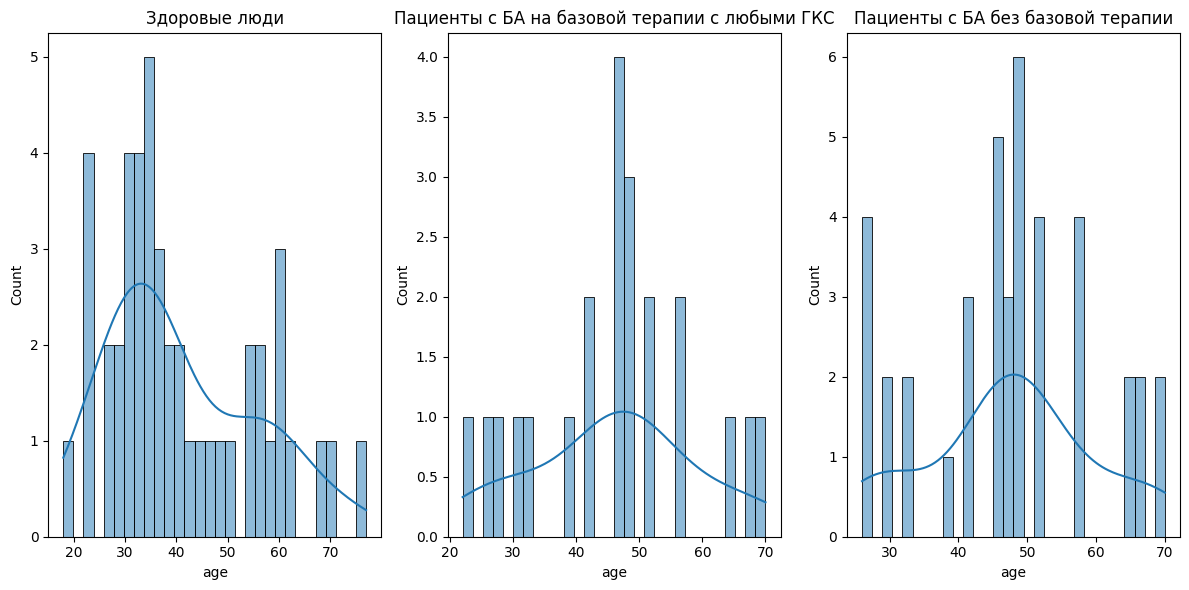

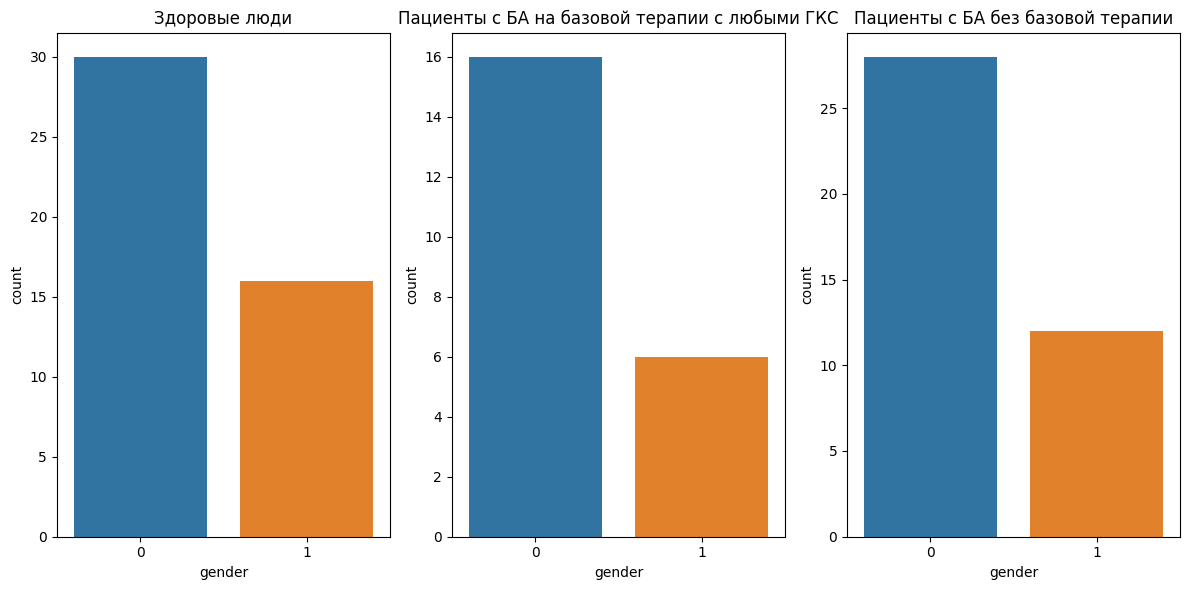

In [24]:
# Выделение подмножеств данных для здоровых людей
healthy_people = df[df['pathology'] == 'health']

# Выделение подмножеств данных для пациентов с БА на лекарственной терапии
people_with_drugs = df[(df['pathology'] == 'BA') & (df['Базовая терапия'] != 'Отсутствует')]

# Выделение подмножеств данных для пациентов с БА без лекарственной терапии
people_without_drugs = df[(df['pathology'] == 'BA') & (df['Базовая терапия'] == 'Отсутствует')]

# График распределения возраста
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(healthy_people['age'], bins=30, kde=True)
plt.title('Здоровые люди')

plt.subplot(1, 3, 2)
sns.histplot(people_with_drugs['age'], bins=30, kde=True)
plt.title('Пациенты с БА на базовой терапии с любыми ГКС')

plt.subplot(1, 3, 3)
sns.histplot(people_without_drugs['age'], bins=30, kde=True)
plt.title('Пациенты с БА без базовой терапии')

plt.tight_layout()
plt.show()

# График распределения пола
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='gender', data=healthy_people)
plt.title('Здоровые люди')

plt.subplot(1, 3, 2)
sns.countplot(x='gender', data=people_with_drugs)
plt.title('Пациенты с БА на базовой терапии с любыми ГКС')

plt.subplot(1, 3, 3)
sns.countplot(x='gender', data=people_without_drugs)
plt.title('Пациенты с БА без базовой терапии')

plt.tight_layout()
plt.show()


In [25]:
U_age_healthy, p_value_age_healthy = mannwhitneyu(people_with_drugs['age'], people_without_drugs['age'])
print(f"U-статистика и p-значение для возраста (базовая терапия с любыми ГКС vs без базовой терапии): {U_age_healthy}, {p_value_age_healthy}")

U-статистика и p-значение для возраста (базовая терапия с любыми ГКС vs без базовой терапии): 407.5, 0.6368330423813122


In [26]:
U_age_healthy, p_value_age_healthy = mannwhitneyu(healthy_people['age'], people_with_drugs['age'])
print(f"U-статистика и p-значение для возраста (здоровые vs базовая терапия с любыми ГКС): {U_age_healthy}, {p_value_age_healthy}")

U-статистика и p-значение для возраста (здоровые vs базовая терапия с любыми ГКС): 392.5, 0.13829047392769522


In [27]:
U_age_healthy, p_value_age_healthy = mannwhitneyu(healthy_people['age'], people_without_drugs['age'])
print(f"U-статистика и p-значение для возраста (здоровые vs без базовой терапии): {U_age_healthy}, {p_value_age_healthy}")

U-статистика и p-значение для возраста (здоровые vs без базовой терапии): 658.0, 0.02346880093009004


In [28]:
U_gender_drugs, p_value_gender_drugs = mannwhitneyu(people_with_drugs['gender'], people_without_drugs['gender'])
print(f"U-статистика и p-значение для пола (базовая терапия с любыми ГКС vs без базовой терапии): {U_gender_drugs}, {p_value_gender_drugs}")

U-статистика и p-значение для пола (базовая терапия с любыми ГКС vs без базовой терапии): 428.0, 0.8296320345271411


In [29]:
U_gender_healthy, p_value_gender_healthy = mannwhitneyu(healthy_people['gender'], people_with_drugs['gender'])
print(f"U-статистика и p-значение для пола (здоровые vs базовая терапия с любыми ГКС): {U_gender_healthy}, {p_value_gender_healthy}")

U-статистика и p-значение для пола (здоровые vs базовая терапия с любыми ГКС): 544.0, 0.5441018007407851


In [30]:
U_gender_healthy, p_value_gender_healthy = mannwhitneyu(healthy_people['gender'], people_without_drugs['gender'])
print(f"U-статистика и p-значение для пола (здоровые vs без базовой терапии): {U_gender_healthy}, {p_value_gender_healthy}")

U-статистика и p-значение для пола (здоровые vs без базовой терапии): 964.0, 0.642641001132933


## Вывод

Исходя из полученных результатов, можно сделать следующие выводы:

* Возраст:

    * Сравнение между группой пациентов, получавших базовую терапию с любыми глюкокортикостероидами (ГКС) и группой без базовой терапии показывает U-статистику равную 407.5 и p-значение 0.6368. Нет статистически значимых различий в возрасте между этими двумя группами.
    
    * Сравнение между группой здоровых пациентов и группой получавших базовую терапию с любыми ГКС показывает U-статистику равную 392.5 и p-значение 0.1383. Нет статистически значимых различий в возрасте между этими двумя группами.

    * Сравнение между группой здоровых пациентов и группой без базовой терапии показывает U-статистику равную 658.0 и p-значение 0.0235. Существуют статистически значимые различия в возрасте между этими двумя группами.

* Пол:

    * Сравнение между группой пациентов, получавших базовую терапию с любыми ГКС, и группой без базовой терапии показывает U-статистику равную 428.0 и p-значение 0.8296. Нет статистически значимых различий по половому признаку между этими двумя группами.

    * Сравнение между группой здоровых пациентов и группой получавших базовую терапию с любыми ГКС показывает U-статистику равную 544.0 и p-значение 0.5441. Нет статистически значимых различий по половому признаку между этими двумя группами.

    * Сравнение между группой здоровых пациентов и группой без базовой терапии показывает U-статистику равную 964.0 и p-значение 0.6426. Нет статистически значимых различий по половому признаку между этими двумя группами.
    
Таким образом, на основе проведенного сравнительного анализа, не было обнаружено статистически значимых различий в возрасте и поле между группой пациентов, получавших базовую терапию с любыми ГКС, и группой без базовой терапии. Однако, существуют статистически значимые различия в возрасте между группой здоровых пациентов и группой без базовой терапии.

<a id="2_3"></a>

## Этап 2.3

* Коллеги хотят понять, есть ассоциации между новыми лабораторными показателями (столбцы N-AE) и стандартными демографическими, клиническими характеристиками и разными видами терапии у пациентов. Предложите варианты решений для ответа на данный вопрос.

[Вернуться к задачам исследования](#Задачи_исследования)

### Анализ ассоциаций между новыми лабораторными показателями и демографическими/клиническими характеристиками может включать следующие шаги:

* Корреляционный анализ: Проверить, есть ли статистически значимые корреляции между новыми лабораторными показателями и стандартными демографическими/клиническими характеристиками. Использовать коэффициенты корреляции Пирсона или Спирмена для непрерывных переменных и коэффициент корреляции Кендалла для категориальных переменных.

* Многофакторный анализ: Можно использовать методы многофакторного анализа, такие как множественная линейная регрессия или логистическая регрессия, чтобы оценить, какие факторы наиболее важны для предсказания новых лабораторных показателей. Это может помочь установить, какие демографические/клинические характеристики или виды терапии являются значимыми предикторами новых показателей.

* Анализ главных компонент (PCA): PCA можно использовать для уменьшения размерности данных и выделения наиболее важных характеристик, которые объясняют наибольшую долю вариации в данных. Это может быть полезно для определения ключевых демографических/клинических характеристик, которые влияют на новые лабораторные показатели.

* Кластерный анализ: Этот метод может быть полезен для определения групп пациентов с похожими характеристиками. Возможно, если у нас есть определенные кластеры пациентов, которые имеют определенные сочетания демографических/клинических характеристик и новых лабораторных показателей.

* Ассоциативные правила: Использование методов майнинга ассоциативных правил, таких как алгоритм Apriori, может помочь выявить интересные отношения между различными характеристиками в ваших данных.

* Машинное обучение: Модели машинного обучения, такие как решающие деревья, случайный лес или градиентный бустинг, могут быть полезны для определения важности различных признаков и для предсказания новых лабораторных показателей на основе демографических/клинических характеристик

### Выполним один из методов для анализа ассоциация

### Корреляционный анализ

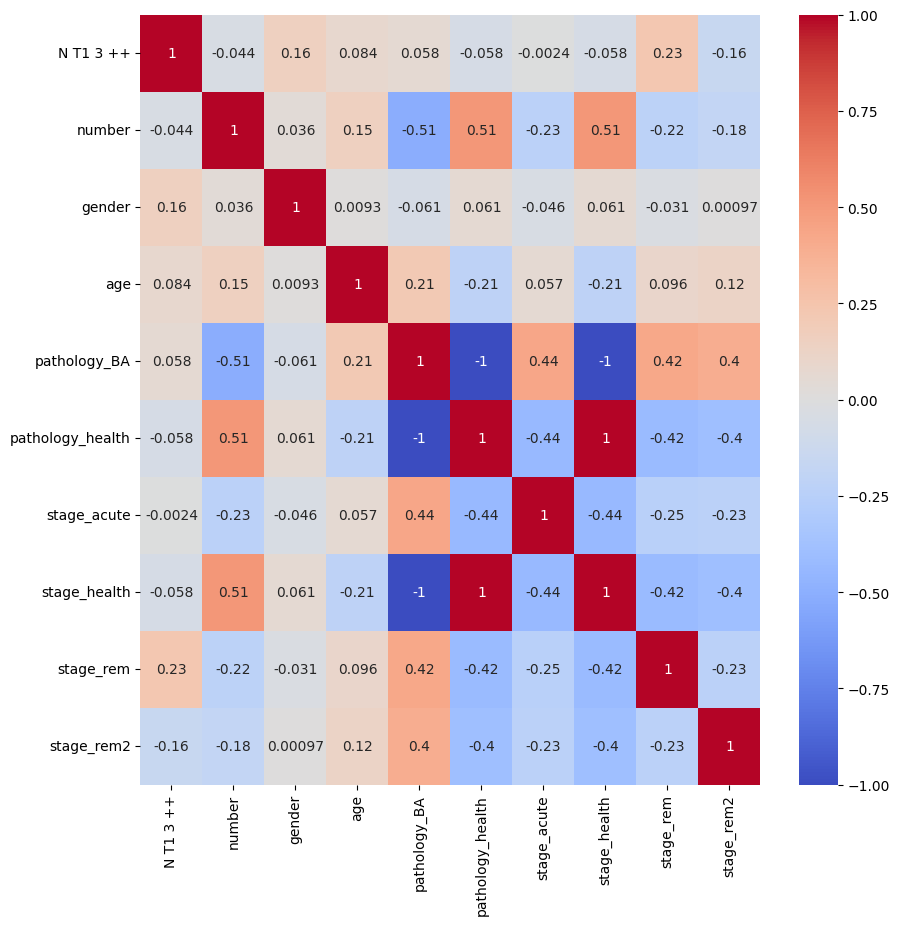

In [31]:
# Выбираем нужные столбцы Excel N = 'N T1 3 ++', A = 'pathology', B = 'stage', C = 'number', D = 'gender', E = 'age'
df_selected = df[['N T1 3 ++', 'pathology', 'stage', 'number', 'gender', 'age']]

# Кодируем категориальные переменные, если есть
df_selected = pd.get_dummies(df_selected)

# Для каждой пары признаков в данных вычисляем корреляцию
correlations = df_selected.corr(method='pearson')  # Используйте 'spearman', если данные не нормально распределены

# Создаем тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm')

# Показываем график
plt.show()

### Вывод

Интерпретируя матрицу корреляции, можно заметить следующее:

* Показатель "N T1 3 ++" слабо коррелирует со всеми другими переменными. Наибольшую корреляцию он имеет со стадией ремиссии ('stage_rem', корреляция 0.23), что может указывать на то, что этот показатель немного увеличивается на этой стадии болезни.

* Номер пациента ('number') имеет умеренную отрицательную корреляцию с бронхиальной астмой ('pathology_BA', корреляция -0.51) и умеренную положительную корреляцию с состоянием здоровья ('pathology_health', корреляция 0.51). Это может быть связано с порядком обследования пациентов или с особенностями выборки.

* Возраст ('age') имеет слабую положительную корреляцию с бронхиальной астмой ('pathology_BA', корреляция 0.21), что может указывать на то, что возраст может влиять на вероятность болезни.

* Имеются сильные отрицательные корреляции между 'pathology_BA' и 'pathology_health' (-1.0), а также между различными стадиями болезни ('stage_acute', 'stage_rem', 'stage_rem2'), что ожидаемо, поскольку эти переменные являются взаимоисключающими.

<a id="2_4"></a>

## Этап 2.4

* Коллеги хотят понять, можно ли новые лабораторные показатели (столбцы N-AE) использовать как диагностические маркеры для того, чтобы различать здоровых и пациентов. Предложите варианты решений для ответа на данный вопрос. Если каких-то данных или групп не хватает в таблице для моделирования – укажите, чего не хватает.

[Вернуться к задачам исследования](#Задачи_исследования)

### Для ответа на вопрос о том, можно ли использовать новые лабораторные показатели в качестве диагностических маркеров для различения здоровых и пациентов, можно применить следующие подходы:

* Классификация с использованием машинного обучения: Построить модель классификации, которая будет использовать показатели 'N T1 3 ++', 'pathology', 'stage', 'number', 'gender' и 'age' в качестве признаков и целевую переменную, указывающую на состояние здоровья (здоровый пациент или пациент с болезнью). Использовать различные алгоритмы классификации, такие как логистическая регрессия, деревья решений, случайный лес и т. д. Для построения модели может потребоваться больше данных, включая достаточное количество примеров здоровых и пациентов с разными значениями показателей.

* Сравнение статистических различий: Провести статистический анализ для сравнения значений показателей 'N T1 3 ++', 'pathology', 'stage', 'number', 'gender' и 'age' у здоровых людей и пациентов. Для этого можно использовать t-тест, анализ вариации (ANOVA) или непараметрические тесты, такие как тест Манна-Уитни. Если в таблице отсутствуют данные о здоровых людях, для сравнения с пациентами необходимо получить соответствующие данные.

* Функциональный анализ: Если показатели 'N T1 3 ++', 'pathology', 'stage', 'number', 'gender' и 'age' имеют функциональную значимость или связь с механизмами заболевания, можно провести функциональный анализ, чтобы понять, как они связаны с заболеванием. Это может включать анализ биологических путей, генной экспрессии, метаболических сетей и других биологических процессов, связанных с патологией.

* Валидация модели: Построить модель классификации для различения здоровых и пациентов, необходимо провести валидацию модели на независимой тестовой выборке или использовать метод перекрестной проверки для оценки ее производительности и обобщающей способности.



### Выполним один из методов использование лабораторных показателей как диагностических маркеров для того, чтобы различать здоровых и пациентов.

Создадим модель которая на основе значений выборки и сравнении средних для определения здоровых и пациентов, будет использовать алгоритм классификации, логистическая регрессия

In [32]:
# Выберем нужные столбцы для моделирования Excel N = 'N T1 3 ++', A = 'pathology', B = 'stage', C = 'number', D = 'gender', E = 'age'
selected_columns = ['N T1 3 ++', 'pathology', 'stage', 'number', 'gender', 'age']
data_selected = df[selected_columns]

# Разделим данные на числовые и категориальные столбцы
numeric_columns = ['N T1 3 ++', 'number', 'age']
categorical_columns = ['pathology', 'stage', 'gender']
numeric_data = data_selected[numeric_columns]
categorical_data = data_selected[categorical_columns]

# Заполним пропущенные значения числовых столбцов средними значениями
imputer_numeric = SimpleImputer(strategy='mean')
numeric_data_imputed = pd.DataFrame(imputer_numeric.fit_transform(numeric_data), columns=numeric_data.columns)

# Заполним пропущенные значения категориальных столбцов наиболее часто встречающимися значениями
imputer_categorical = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = pd.DataFrame(imputer_categorical.fit_transform(categorical_data), columns=categorical_data.columns)

# Преобразуем категориальные переменные в числовой формат с помощью OneHotEncoder
encoder = OneHotEncoder()
categorical_data_encoded = pd.get_dummies(categorical_data_imputed, columns=categorical_columns)

# Объединим числовые и категориальные данные
data_imputed = pd.concat([numeric_data_imputed, categorical_data_encoded], axis=1)

# Разделим данные на обучающую и тестовую выборки
X = data_imputed.drop(['pathology_BA', 'pathology_health'], axis=1)  # Входные признаки
y = data_imputed['pathology_BA']  # Целевая переменная
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим и обучим модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предскажем классы для тестовой выборки
y_pred = model.predict(X_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


In [33]:
df.head(1)

,pathology,stage,number,gender,age,длительность заболевания,severity,тяжесть градация,FEV1/FEV,stepen,динамика состояния,Базовая терапия,СРБ,N T1 3 ++,N T1 3 pe+,N T1 3 full,N T2 3 ++,N T2 3 pe+,N T2 3 full,% 1apc 3 --,% 1pe 3 --,% mean 3 --,% 1apc 3 ++,% 1pe 3 ++,% mean 3 ++,% 1apc 3 T1+,% 1pe 3 T1+,% mean 3 T1+,% 1apc 3 T2+,% 1pe 3 T2+,% mean 3 T2+,FEV1/FEV
0,BA,acute,4,0,30.00,3.00,2.00,1.00,0.81,1.00,0.00,"Будесонид/Формотерол 160/4,5 мкг по 1 дозе 2 р...",0.70,626.31,799.27,615.88,1320.28,1132.83,1141.82,41.20,47.50,44.35,6.90,34.20,20.55,34.20,5.70,19.95,3.30,48.60,25.95,NaN


## Вывод

Результат точности модели составляет 1.0, что означает, что модель правильно классифицирует 100% тестовых наблюдений. Это отличный результат, что может указывать на то, что новые лабораторные показатели могут быть полезны для различения здоровых и больных пациентов. Однако, необходимо учитывать, что точность модели может зависеть от многих факторов, включая размер выборки, качество данных и выбор алгоритма моделирования.